In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv("raw_dataset.csv")


In [23]:
df.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [40]:
df.head()


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [41]:
X = df.iloc[:, :].values
#not correct
y = df.iloc[:,-1].values

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)


Number of samples: 5875
Number of features: 21


In [42]:
print(X.shape)

(5875, 21)


In [43]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x)/len(x)

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)


In [44]:
print(X_std)

[[ 0.81569539 -0.68250887 -1.63209025 ... -1.21406557 -1.47849968
  -0.65065821]
 [ 0.81569539 -0.68250887 -1.5006763  ... -1.05511879 -1.24788006
  -1.21858474]
 [ 0.81569539 -0.68250887 -1.36941017 ... -0.78485974 -1.5401393
  -0.10328021]
 ...
 [-0.43136086 -0.68250887  1.19676305 ... -0.62937908 -1.04885603
  -0.85275524]
 [-0.43136086 -0.68250887  1.32606439 ...  0.26914065 -1.26903782
  -0.8476181 ]
 [-0.43136086 -0.68250887  1.45704984 ...  0.44175389 -1.163249
  -0.72388969]]


In [45]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

In [46]:
print(cov_mat)

[[ 1.00017024e+00 -4.16088115e-02  1.98872286e-02  2.73711350e-01
   3.10342753e-01  2.30751092e-02  3.56974166e-02  1.02567341e-02
   1.32016139e-02  1.02595818e-02  1.01571144e-01  1.11148583e-01
   9.89291396e-02  8.99982118e-02  1.35260967e-01  9.89299618e-02
   7.09390599e-03 -1.04859917e-01  9.02236764e-02 -9.28859692e-02
   1.20810316e-01]
 [-4.16088115e-02  1.00017024e+00 -9.80665300e-03 -3.12103268e-02
  -9.65753189e-02  5.14303716e-02 -1.54671628e-01  7.67312809e-02
   8.80097484e-02  7.67162265e-02  5.87457853e-02  5.64901472e-02
   4.49448497e-02  6.48303322e-02  2.33638394e-02  4.49452448e-02
   1.68198149e-01 -1.67140742e-04 -1.59289554e-01 -1.65141580e-01
  -9.99176919e-02]
 [ 1.98872286e-02 -9.80665300e-03  1.00017024e+00  6.79298266e-02
   7.52754733e-02 -2.28409805e-02 -1.13667464e-02 -2.88927497e-02
  -2.32938732e-02 -2.88808986e-02 -3.38759459e-02 -3.09676832e-02
  -2.90246333e-02 -3.65106408e-02 -3.91163539e-02 -2.90217992e-02
  -2.63615203e-02  3.65510852e-02 -3.8

In [55]:
from numpy import array,identity,diagonal
from math import sqrt

def jacobi(a,tol = 1.0e-9): # Jacobi method

    def maxElem(a): # Find largest off-diag. element a[k,l]
        n = len(a)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(a[i,j]) >= aMax:
                    aMax = abs(a[i,j])
                    k = i; l = j
        return aMax,k,l

    def rotate(a,p,k,l): # Rotate to make a[k,l] = 0
        n = len(a)
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1.0e-36: t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + sqrt(phi**2 + 1.0))
            if phi < 0.0: t = -t
        c = 1.0/sqrt(t**2 + 1.0); s = t*c
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        for i in range(k):      # Case of i < k
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(k+1,l):  # Case of k < i < l
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n):  # Case of i > l
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n):      # Update transformation matrix
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l])
        
    n = len(a)
    maxRot = 5*(n**2)       # Set limit on number of rotations
    p = identity(n)*1.0     # Initialize transformation matrix
    for i in range(maxRot): # Jacobi rotation loop 
        aMax,k,l = maxElem(a)
        if aMax < tol: return diagonal(a),p
        rotate(a,p,k,l)
    print ('Jacobi method did not converge')

In [61]:
# A = np.array([
#         [7.0, -1.0, -2.0, 3.0],
#         [-1.0, 6.0, 0.0, 2.0],
#         [-2.0, 0.0, 5.0, 1.0],
#         [3.0, 2.0, 1.0, 7.0]
#     ])
eig_vals,eig_vecs=jacobi(cov_mat)
print(eig_vals)

[8.34465441e-01 1.43539427e+00 9.98473314e-01 4.86956550e-02
 2.18074191e+00 1.70146547e+00 9.88754856e-02 3.77656507e-07
 4.03181586e-02 8.63480017e-03 4.44749606e-03 2.01690861e-02
 2.08431949e-08 1.38300302e-02 2.06664124e-01 1.13002319e+01
 1.48032738e-01 1.69373027e-01 7.03886042e-01 7.96475413e-01
 2.93400298e-01]


In [59]:
# from numpy.linalg import eig
# 
# # Eigendecomposition of covariance matrix
# eig_vals, eig_vecs = eig(cov_mat) 
# 
# # Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
# max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
# signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
# eig_vecs = eig_vecs*signs[np.newaxis,:]
# eig_vecs = eig_vecs.T
# 
# print('Eigenvalues \n', eig_vals)
# print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [ 1.13002319e+01+0.j          2.18074191e+00+0.j
  1.70146544e+00+0.j          1.43539428e+00+0.j
  9.98473317e-01+0.j          8.34465521e-01+0.j
  7.96478735e-01+0.j          7.03883908e-01+0.j
 -5.05411653e-02+0.j         -3.84712226e-02+0.0408141j
 -3.84712226e-02-0.0408141j  -1.43847369e-03+0.07388655j
 -1.43847369e-03-0.07388655j  6.22270188e-02+0.08930383j
  6.22270188e-02-0.08930383j  4.11080504e-02+0.j
  1.49338941e-01+0.07479538j  1.49338941e-01-0.07479538j
  2.13708902e-01+0.01444356j  2.13708902e-01-0.01444356j
  2.91142835e-01+0.j        ]
Eigenvectors 
 [[ 7.85264652e-13-0.00000000e+00j -2.58637271e-12+0.00000000e+00j
   4.19184316e-12-0.00000000e+00j -5.02528999e-12+0.00000000e+00j
  -6.40878902e-13+0.00000000e+00j -1.55863185e-11+0.00000000e+00j
  -3.79929602e-11+0.00000000e+00j -6.45413260e-12+0.00000000e+00j
   7.36611599e-13-0.00000000e+00j -5.21574300e-11+0.00000000e+00j
  -4.84841330e-12+0.00000000e+00j -7.24054426e-12+0.00000000e+00j
  -7.51574825e-1

In [62]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(11.30023191491009, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0.])), (2.180741913173281, array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), (1.7014654717558457, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), (1.4353942706070484, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), (0.998473314484827, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), (0.8344654406415468, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), (0.7964754134475333, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0.])), (0.7038860416109787, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.])), (0.2934002981368644, array

In [72]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(19, 21)


Explained variance: [5.380e+01 1.038e+01 8.100e+00 6.830e+00 4.750e+00 3.970e+00 3.790e+00
 3.350e+00 1.400e+00 9.800e-01 8.100e-01 7.000e-01 4.700e-01 2.300e-01
 1.900e-01 1.000e-01 7.000e-02 4.000e-02 2.000e-02 0.000e+00 0.000e+00]
Cumulative explained variance: [53.8  64.18 72.28 79.11 83.86 87.83 91.62 94.97 96.37 97.35 98.16 98.86
 99.33 99.56 99.75 99.85 99.92 99.96 99.98 99.98 99.98]


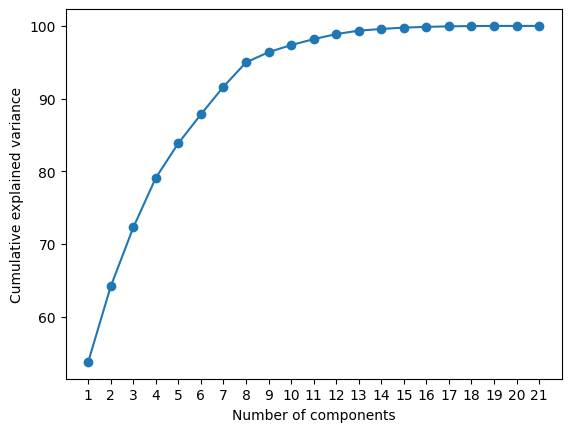

In [69]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [70]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

(5875, 19)


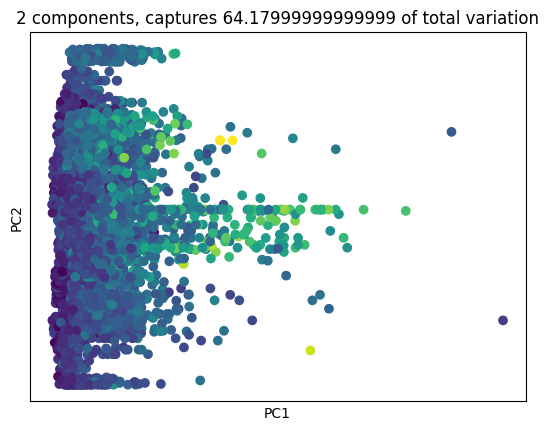

In [71]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Components:
 [[ 0.02753863  0.00917246 -0.00963859  0.03995723  0.03815415  0.26589286
   0.24864455  0.25797902  0.26401482  0.25798048  0.27806954  0.2784311
   0.2685717   0.27399166  0.26157419  0.26857128  0.25767747 -0.25672977
   0.16761131  0.06874164  0.23011099]
 [-0.35054041  0.09062224 -0.07956345 -0.61462775 -0.62564389  0.0909302
   0.07268502  0.10457898  0.092488    0.10457085 -0.02436145 -0.02991107
  -0.02128345 -0.01869529 -0.06051399 -0.02128374  0.05229843  0.06226788
  -0.09936334  0.15868482 -0.03649555]]
Explained variance ratio:
 [0.53801469 0.10382718]
Cumulative explained variance:
 [0.53801469 0.64184187]
Transformed data shape: (5875, 2)


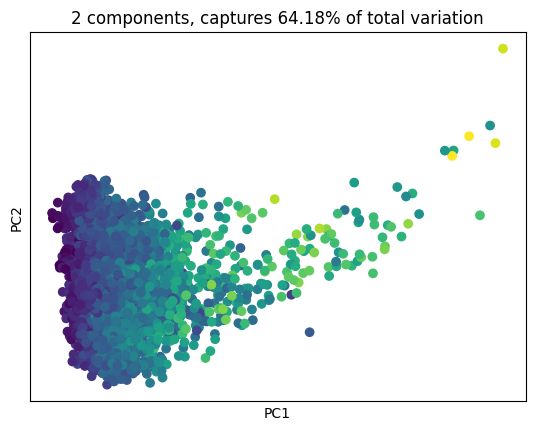

In [77]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()